<a href="https://colab.research.google.com/github/Jayden-Nyamiaka/Machine-Learning-and-Data-Mining/blob/main/nyamiaka_jayden_prob3_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3 Sample Code

This sample code is meant as a guide on how to use PyTorch and how to use the relevant model layers. This not a guide on how to design a network and the network in this example is intentionally designed to have poor performace.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

## Loading MNIST
The `torchvision` module contains links to many standard datasets. We can load the MNIST dataset into a `Dataset` object as follows:

In [ ]:
train_dataset = datasets.MNIST('./data', train=True, download=True,  # Downloads into a directory ../data
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, download=False,  # No need to download again
                              transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



The `Dataset` object is an iterable where each element is a tuple of (input `Tensor`, target):

In [ ]:
print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]))

60000 <class 'torch.Tensor'> <class 'int'>


In [ ]:
print("The training dataset has", len(train_dataset), "images with a tuple of (input Tensor, int target) for each image")
print("The testing dataset has", len(test_dataset), "images of similar representation")

first_img = train_dataset[0][0]
print("Each image has", len(first_img), "data structure that stores the representation of the image.")

print("Height of each image:", len(first_img[0]))
print("Width of each image:", len(first_img[0][0]))
print("Type for each float:", first_img[0][0][0].dtype)

The training dataset has 60000 images with a tuple of (input Tensor, int target) for each image
The testing dataset has 10000 images of similar representation
Each image has 1 data structure that stores the representation of the image.
Height of each image: 28
Width of each image: 28
Type for each float: torch.float32


We can convert images to numpy arrays and plot them with matplotlib:

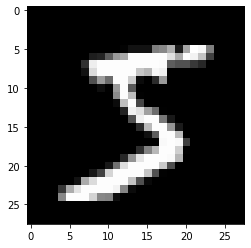

In [ ]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

## Removed All Unnecessary Initializations (Go to Problem 3B for those)

## Finding Model Helper Functions

In [ ]:
# Some layers, such as Dropout, behave differently during training
def train_model(model, epochs, train_loader, optimizer, loss_fn):
  model.train()
  final_loss = 0
  for epoch in range(epochs):
      for batch_idx, (data, target) in enumerate(train_loader):
          # Erase accumulated gradients
          optimizer.zero_grad()

          # Forward pass
          output = model(data)

          # Calculate loss
          loss = loss_fn(output, target)

          # Backward pass
          loss.backward()
          
          # Weight update
          optimizer.step()

      # Updates loss for this epoch
      final_loss = loss.item() 
  avg_loss = final_loss / len(train_loader.dataset)
  return avg_loss

def evaluate_model(model, test_loader, loss_fn, printAccuracy):
  model.eval()
  test_loss = 0
  correct = 0
  # Turning off automatic differentiation
  with torch.no_grad():
      for data, target in test_loader:
          output = model(data)
          test_loss += loss_fn(output, target).item()  # Sum up batch loss
          pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
          correct += pred.eq(target.view_as(pred)).sum().item()
  avg_loss = test_loss / len(test_loader.dataset)
  eval_accuracy = 100. * correct / len(test_loader.dataset)
  if (printAccuracy):
    print('Accuracy: %d/%d (%.4f)' % (correct, len(test_loader.dataset), eval_accuracy) )
  return eval_accuracy

## Our Final Model

In [ ]:
torch.manual_seed(0)

epochs = 40

model = nn.Sequential(
  nn.Flatten(), 

  nn.Linear(784, 100),
  nn.ReLU(),
  nn.Dropout(0.3),
  
  nn.Linear(100, 100),
  nn.ReLU(),
  nn.Dropout(0.2),

  nn.Linear(100, 10)
)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True) 
  
train_model(model, epochs, train_loader, optimizer, loss_fn)
print("Accuracy of Final Model:", end = " ")
evaluate_model(model, test_loader, loss_fn, True)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.3, inplace=False)
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=100, out_features=10, bias=True)
)
Accuracy of Final Model: Accuracy: 9802/10000 (98.0200)


98.02